In [ ]:
import pandas as pad
import numpy as np
import soundfile
import os, glob, pickle
import sys

In [ ]:
import librosa
import librosa.display
import seaborn as sbn
import matplotlib.pyplot as mplt

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from IPython.display import Audio

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
Root = "/content/drive/MyDrive/SpeechDataset/audio_speech_actors_01-24"
os.chdir(Root)

In [ ]:
ls

Actor_01/  Actor_05/  Actor_09/  Actor_13/  Actor_17/  Actor_21/  data_path.csv
Actor_02/  Actor_06/  Actor_10/  Actor_14/  Actor_18/  Actor_22/
Actor_03/  Actor_07/  Actor_11/  Actor_15/  Actor_19/  Actor_23/
Actor_04/  Actor_08/  Actor_12/  Actor_16/  Actor_20/  Actor_24/


In [ ]:
RavdessData = '/content/drive/MyDrive/SpeechDataset/audio_speech_actors_01-24/'
ravdessDirectoryList = os.listdir(RavdessData)
fileEmotion = []
filePath = []

for dir in ravdessDirectoryList:
    actor_path = os.path.join(RavdessData, dir)
    if os.path.isdir(actor_path):
        actor = os.listdir(actor_path)
        for file in actor:
            part = file.split('.')[0]
            part = part.split('-')
            fileEmotion.append(int(part[2]))
            filePath.append(os.path.join(actor_path, file))

emotion_df = pad.DataFrame(fileEmotion, columns=['Emotions'])
path_df = pad.DataFrame(filePath, columns=['Path'])
Ravdess_df = pad.concat([emotion_df, path_df], axis=1)

In [ ]:
Ravdess_df. Emotions.replace({1: 'neutral', 2:'calm', 3: 'happy', 4: 'sad', 5:'angry', 6: 'fear', 7:'disgust', 8: 'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,sad,/content/drive/MyDrive/SpeechDataset/audio_spe...
1,neutral,/content/drive/MyDrive/SpeechDataset/audio_spe...
2,calm,/content/drive/MyDrive/SpeechDataset/audio_spe...
3,fear,/content/drive/MyDrive/SpeechDataset/audio_spe...
4,sad,/content/drive/MyDrive/SpeechDataset/audio_spe...


In [ ]:
dataPath = pad.concat([Ravdess_df], axis = 0)
dataPath.to_csv ("data_path.csv", index=False)
dataPath.head()

,Emotions,Path
0,sad,/content/drive/MyDrive/SpeechDataset/audio_spe...
1,neutral,/content/drive/MyDrive/SpeechDataset/audio_spe...
2,calm,/content/drive/MyDrive/SpeechDataset/audio_spe...
3,fear,/content/drive/MyDrive/SpeechDataset/audio_spe...
4,sad,/content/drive/MyDrive/SpeechDataset/audio_spe...


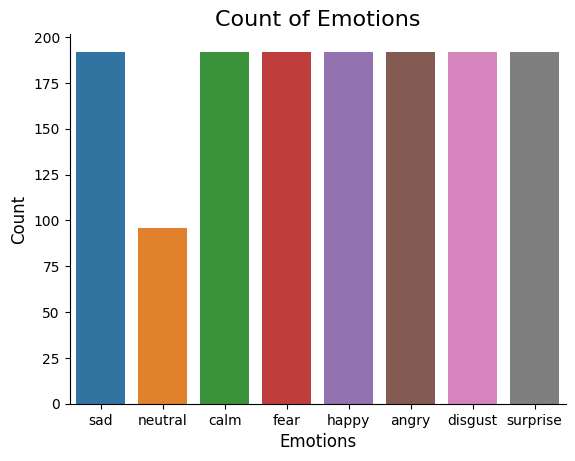

In [ ]:
mplt.title('Count of Emotions', size=16)
sbn.countplot(data=dataPath, x='Emotions')
mplt.ylabel('Count', size=12)
mplt.xlabel('Emotions', size=12)
sbn.despine(top=True, right=True, left=False, bottom=False)
mplt.show()

In [ ]:
def createWaveplot(data, sr, e):
    mplt.figure(figsize=(10, 3))
    mplt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    mplt.show()

In [ ]:
def createSpectrogram(data, sr, emotion):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    mplt.figure(figsize=(12, 3))
    mplt.title(f'Spectrogram for audio with {emotion} emotion', size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    mplt.colorbar()

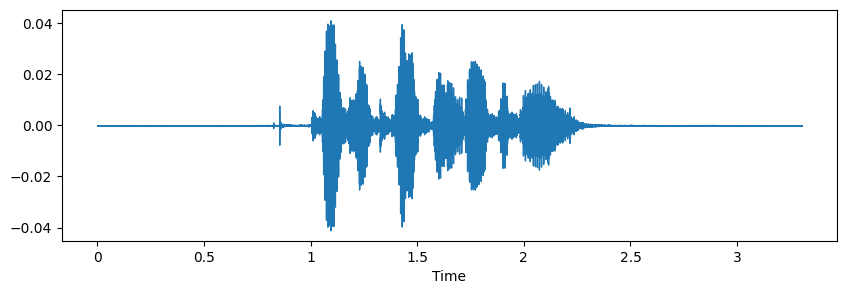

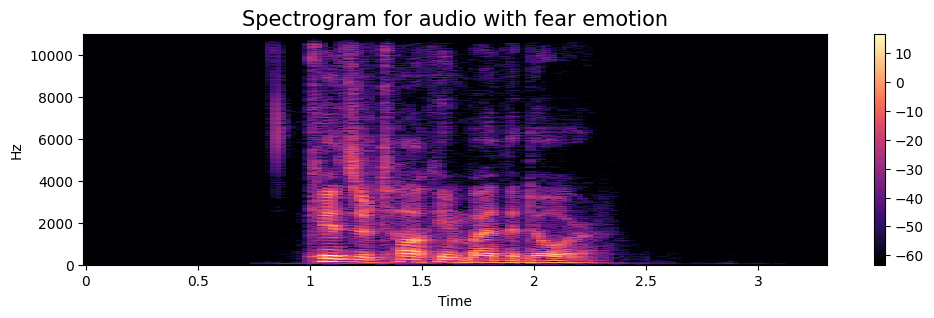

In [ ]:
emotion = 'fear'
data, sampling_rate = librosa.load('/content/drive/MyDrive/SpeechDataset/Actor_01/03-01-01-01-01-01-01.wav')
mplt.figure(figsize=(10, 3))
librosa.display.waveshow(data, sr=sampling_rate)
path = np.array(dataPath.Path[dataPath.Emotions == emotion])[1]
createSpectrogram(data, sampling_rate, emotion)
Audio(path)

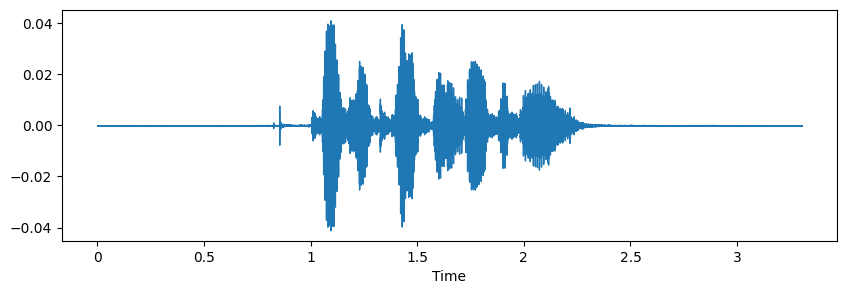

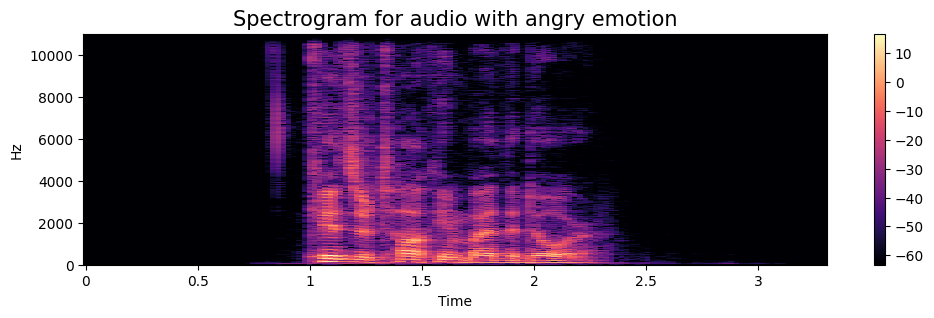

In [ ]:
emotion = 'angry'
data, sampling_rate = librosa.load('/content/drive/MyDrive/SpeechDataset/Actor_01/03-01-01-01-01-01-01.wav')
mplt.figure(figsize=(10, 3))
librosa.display.waveshow(data, sr=sampling_rate)
path = np.array(dataPath.Path[dataPath.Emotions == emotion])[1]
createSpectrogram(data, sampling_rate, emotion)
Audio(path)

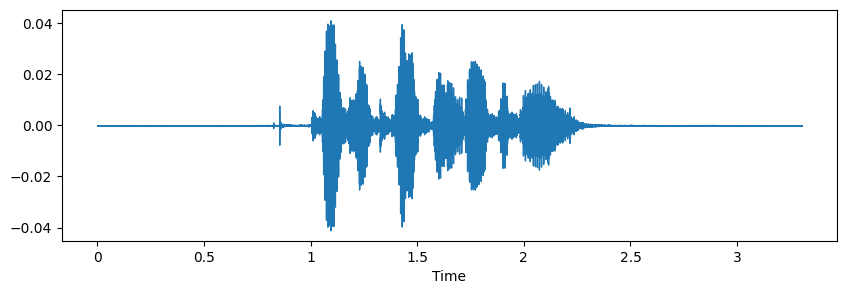

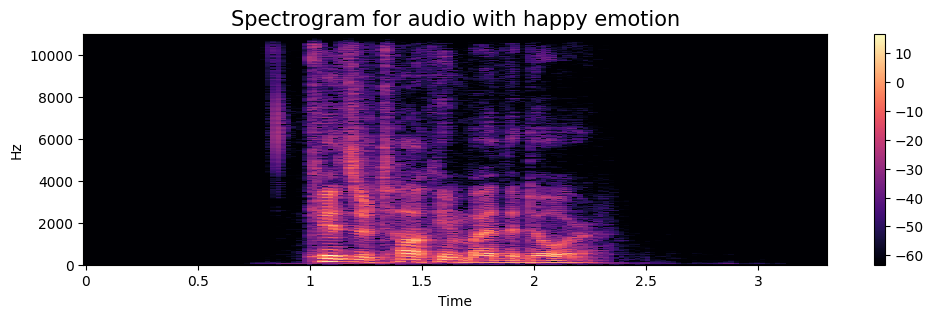

In [ ]:
emotion = 'happy'
data, sampling_rate = librosa.load('/content/drive/MyDrive/SpeechDataset/Actor_01/03-01-01-01-01-01-01.wav')
mplt.figure(figsize=(10, 3))
librosa.display.waveshow(data, sr=sampling_rate)
path = np.array(dataPath.Path[dataPath.Emotions == emotion])[1]
createSpectrogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
def noise(data):
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(data, shift_range)

In [ ]:
path = np.array(dataPath.Path)[100]
data_sample_rate = librosa.load(path)
emotion = 'fear'
path = np.array(dataPath.Path[dataPath.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)

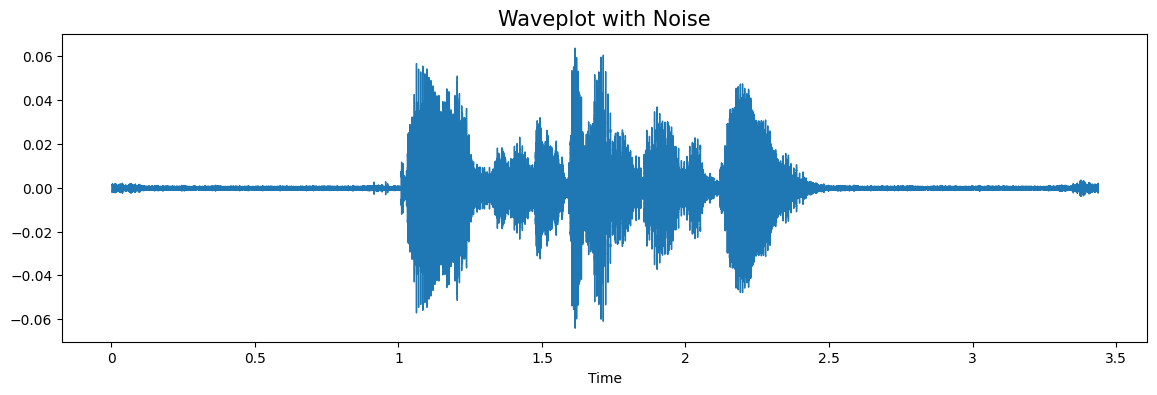

In [ ]:
x = noise(data)
mplt.figure(figsize=(14, 4))
mplt.title('Waveplot with Noise', size=15)
librosa.display.waveshow(y=x, sr=sampling_rate)
mplt.show()
Audio(x, rate=sampling_rate)

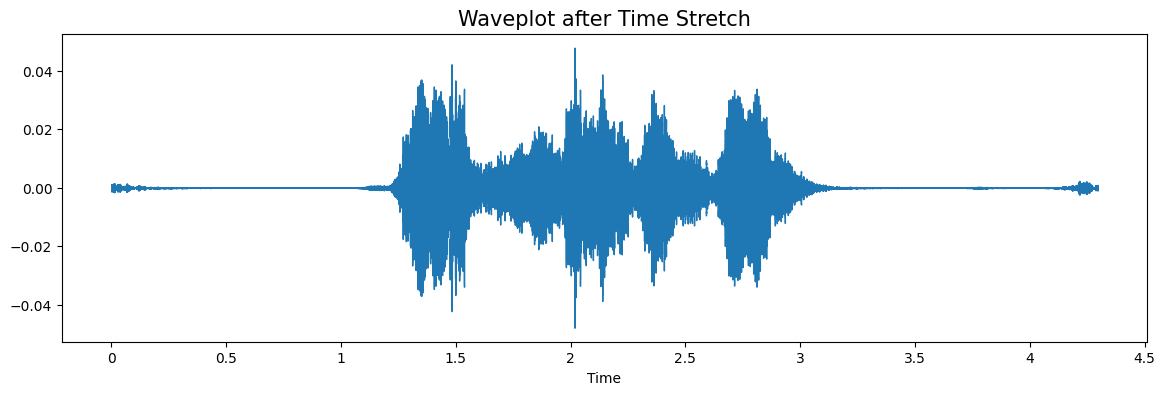

In [ ]:
def stretch_audio(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)
x = stretch_audio(data)
mplt.figure(figsize=(14, 4))
mplt.title('Waveplot after Time Stretch', size=15)
librosa.display.waveshow(y=x, sr=sampling_rate)
mplt.show()
Audio(x, rate=sampling_rate)

In [ ]:
path = np.array(dataPath.Path)[2]
data, sampleRate = librosa.load(path)
emotion = 'angry'
path = np.array(dataPath.Path[dataPath.Emotions == emotion])[2]
data, sampling_Rate = librosa.load(path)

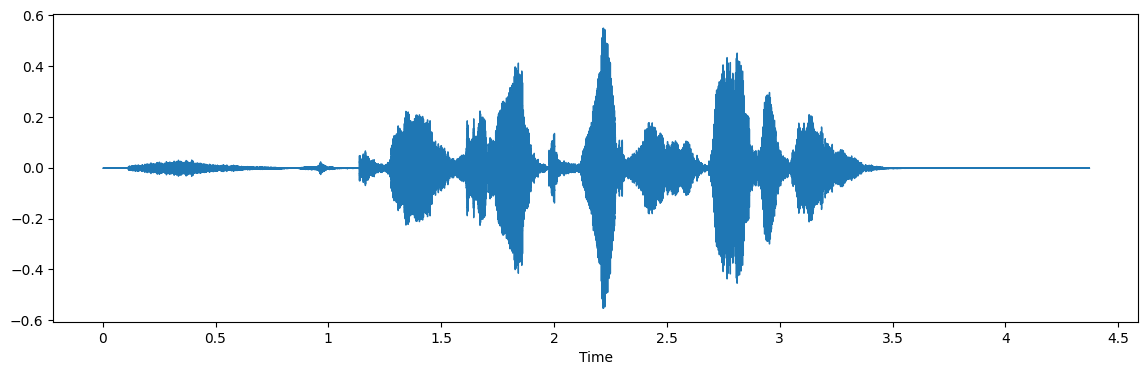

In [ ]:
x = shift(data)
mplt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sampleRate)
Audio(x, rate=sampleRate)

In [ ]:
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [ ]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [ ]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("/content/drive/MyDrive/SpeechDataset/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [ ]:
#Splitting dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [ ]:
x_train

array([[-6.02389954e+02,  5.97717743e+01,  8.60734844e+00, ...,
         2.24425294e-05,  7.05290176e-06,  3.74911019e-06],
       [-6.64690369e+02,  6.82226181e+01,  6.91438007e+00, ...,
         1.92348180e-05,  1.16888250e-05,  1.09572538e-05],
       [-5.56770630e+02,  3.49958611e+01, -1.21606884e+01, ...,
         1.56850641e-04,  9.86818704e-05,  6.10335883e-05],
       ...,
       [-6.41358337e+02,  4.56047516e+01,  3.17263484e-01, ...,
         3.32857708e-05,  2.42486913e-05,  1.74304023e-05],
       [-6.41742493e+02,  3.81749878e+01, -8.41347885e+00, ...,
         3.26658337e-05,  2.97957540e-05,  2.17277611e-05],
       [-7.70246155e+02,  3.43720894e+01,  5.50091887e+00, ...,
         4.58828936e-06,  2.15270302e-06,  1.44739533e-06]])

In [ ]:
#Getting the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(576, 192)


In [ ]:
#Getting the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [ ]:
#Initialize the MultiLayer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [ ]:
#Train the model
model.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(300,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
#Predicting for the test set
y_pred=model.predict(x_test)

In [ ]:
y_pred

array(['calm', 'disgust', 'calm', 'happy', 'calm', 'happy', 'disgust',
       'calm', 'happy', 'fearful', 'calm', 'fearful', 'disgust',
       'fearful', 'fearful', 'calm', 'happy', 'fearful', 'disgust',
       'calm', 'happy', 'happy', 'fearful', 'happy', 'happy', 'calm',
       'disgust', 'calm', 'happy', 'happy', 'happy', 'calm', 'happy',
       'happy', 'fearful', 'calm', 'disgust', 'calm', 'happy', 'disgust',
       'calm', 'disgust', 'happy', 'happy', 'calm', 'fearful', 'calm',
       'fearful', 'calm', 'happy', 'happy', 'disgust', 'fearful', 'calm',
       'fearful', 'happy', 'fearful', 'disgust', 'disgust', 'calm',
       'happy', 'fearful', 'disgust', 'fearful', 'fearful', 'calm',
       'happy', 'happy', 'calm', 'happy', 'fearful', 'calm', 'calm',
       'calm', 'disgust', 'calm', 'fearful', 'happy', 'happy', 'disgust',
       'happy', 'fearful', 'fearful', 'fearful', 'calm', 'calm', 'calm',
       'disgust', 'happy', 'calm', 'happy', 'calm', 'calm', 'fearful',
       'calm',

In [ ]:
#Calculating and Printing the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 73.44%


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
f1_score(y_test, y_pred,average=None)

array([0.8173913 , 0.65822785, 0.70967742, 0.72164948])

In [ ]:
import pandas as pd
df=pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df.head(20)

,Actual,Predicted
0,calm,calm
1,disgust,disgust
2,calm,calm
3,happy,happy
4,happy,calm
5,happy,happy
6,disgust,disgust
7,disgust,calm
8,happy,happy
9,fearful,fearful


In [ ]:
import pickle
with open( 'modelForPrediction1.sav', 'wb') as f:
    pickle.dump(model,f)

In [ ]:
filename = 'modelForPrediction1.sav'
loaded_model = pickle.load(open(filename, 'rb'))
feature=extract_feature("/content/drive/MyDrive/SpeechDataset/Actor_01/03-01-01-01-01-01-01.wav", mfcc=True, chroma=True, mel=True)

feature=feature.reshape(1,-1)

prediction=loaded_model.predict(feature)
prediction

array(['disgust'], dtype='<U7')